In [71]:
import keras
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [72]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    n_steps = series.shape[0]
    plt.plot(series, ".-", label='x')

    if y is not None:
        plt.plot(n_steps, y, "bx", label="actual y", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro", label="predicted y")
    
    plt.grid(True)

    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, None, None])
    plt.legend()

In [73]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, None, None])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [74]:
df = pd.read_csv("./ulsan/Ulsan_Temp.csv")

In [75]:
df.tail(10)

,Date,Temperature(M),Temperature(L),Temperature(H)
754,2021-05-24,19.6,17.4,24.2
755,2021-05-25,19.0,13.9,24.3
756,2021-05-26,18.3,12.1,23.7
757,2021-05-27,19.1,14.9,24.4
758,2021-05-28,17.5,12.1,26.0
759,2021-05-29,19.3,12.1,25.9
760,2021-05-30,19.2,14.3,24.1
761,2021-05-31,19.0,15.2,25.1
762,2021-06-01,20.3,14.1,25.8
763,2021-06-02,20.9,17.5,26.3


In [76]:
n_step = 5

temperature = df['Temperature(H)'].values
print(temperature.shape)

(764,)


In [77]:
temperature[:10]

array([23.1, 22.5, 24.4, 25.7, 28.7, 20.2, 20.6, 24.7, 25.7, 25.7])

In [78]:
temperature = temperature[:(temperature.shape[0] // (n_step + 1)) * (n_step + 1)].reshape(-1, (n_step+1))

r = temperature.shape[0]

r

127

In [79]:
X_train, y_train = temperature[:int(r*0.8), :n_step, np.newaxis], temperature[:int(r*0.8), -1, np.newaxis]
X_valid, y_valid = temperature[int(r*0.8):int(r*0.9), :n_step, np.newaxis], temperature[int(r*0.8):int(r*0.9), -1, np.newaxis]
X_test, y_test = temperature[int(r*0.9):-1, :n_step, np.newaxis], temperature[int(r*0.9):-1, -1, np.newaxis]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(101, 5, 1) (101, 1)
(13, 5, 1) (13, 1)
(12, 5, 1) (12, 1)


In [151]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=[n_step, 1]),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    keras.layers.Dense(1, activation="linear")
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=150,
                    validation_data=(X_valid, y_valid))

Epoch 1/150
4/4 [==============================] - 3s 259ms/step - loss: 490.4806 - val_loss: 108.8317
Epoch 2/150
4/4 [==============================] - 0s 34ms/step - loss: 472.6644 - val_loss: 101.3883
Epoch 3/150
4/4 [==============================] - 0s 34ms/step - loss: 450.2903 - val_loss: 91.1497
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 418.3280 - val_loss: 77.4081
Epoch 5/150
4/4 [==============================] - 0s 11ms/step - loss: 374.5200 - val_loss: 62.6911
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 326.1231 - val_loss: 51.5525
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 281.2599 - val_loss: 45.3693
Epoch 8/150
4/4 [==============================] - 0s 13ms/step - loss: 244.2417 - val_loss: 42.9809
Epoch 9/150
4/4 [==============================] - 0s 13ms/step - loss: 215.6435 - val_loss: 42.9605
Epoch 10/150
4/4 [==============================] - 0s 12ms/step - loss: 194.7809 - val_

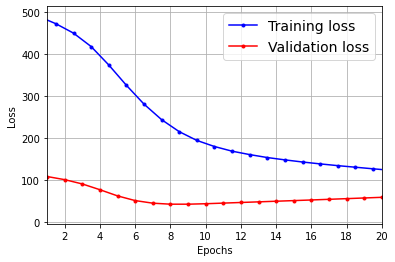

In [152]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [153]:
X_valid[0, :, 0]

array([10.2, 14.1, 15.6,  1.8,  1.5])

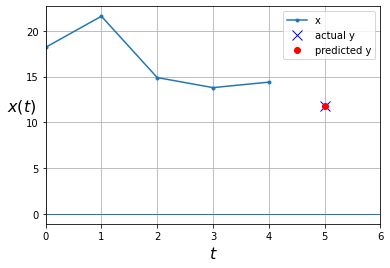

In [154]:
y_pred = model.predict(X_test)
plot_series(X_test[0, :, 0], y_test[0, 0], y_test[0, 0])
plt.show()

In [155]:
model.evaluate(X_valid, y_valid)

1/1 [==============================] - 0s 16ms/step - loss: 40.6820


40.6820068359375

In [156]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 15ms/step - loss: 18.5584


18.558429718017578

In [157]:
X_test[0].shape

(5, 1)

In [158]:
model.predict(X_test)

array([[15.5413475],
       [17.262594 ],
       [21.150135 ],
       [16.417994 ],
       [15.838232 ],
       [18.732113 ],
       [23.609888 ],
       [22.126692 ],
       [22.948298 ],
       [22.667894 ],
       [22.280424 ],
       [23.55837  ]], dtype=float32)

In [159]:
n_steps = 5
real_temp = np.array([[26],[25.9],[24.1],[25.1],[25.8]]).reshape(1, n_steps, 1)

In [160]:
model.predict(real_temp)

array([[23.879736]], dtype=float32)

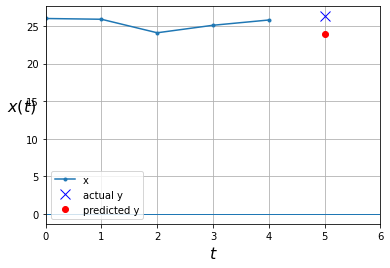

In [161]:
y_pred = model.predict(real_temp)
plot_series(real_temp[0, :, 0], [26.3], y_pred[0, 0])
plt.show()